# Predição de Churn de Clientes Telco

## Objetivo
Usar dados históricos de clientes para prever quais têm maior probabilidade de cancelamento,
permitindo ações proativas de marketing e retenção.

## Fluxo
CSV → Exploração → Modelo → Avaliação → Gerando valor com o modelo


## Instalando as bibliotecas

In [1]:
! pip install seaborn matplotlib scikit-learn

## Importando de bibliotecas de IA tradicional

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Upload e visualização dos dados

In [24]:
df = pd.read_csv("telco_churn.csv")
df.head()

,id_cliente,tempo_contrato_meses,valor_mensal,uso_dados_gb,qtd_reclamacoes,atraso_pagamento,recebeu_campanha,churn
0,1001,2,180,4,2,1,0,1
1,1002,36,95,28,0,0,1,0
2,1003,12,130,12,1,0,1,0
3,1004,1,200,3,3,1,0,1
4,1005,48,85,40,0,0,1,0


## Explorando o dado

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   id_cliente            30 non-null     int64
 1   tempo_contrato_meses  30 non-null     int64
 2   valor_mensal          30 non-null     int64
 3   uso_dados_gb          30 non-null     int64
 4   qtd_reclamacoes       30 non-null     int64
 5   atraso_pagamento      30 non-null     int64
 6   recebeu_campanha      30 non-null     int64
 7   churn                 30 non-null     int64
dtypes: int64(8)
memory usage: 2.0 KB


In [26]:
df.describe()

,id_cliente,tempo_contrato_meses,valor_mensal,uso_dados_gb,qtd_reclamacoes,atraso_pagamento,recebeu_campanha,churn
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,1015.500000,20.633333,133.966667,18.300000,0.966667,0.333333,0.566667,0.433333
std,8.803408,17.771506,37.592629,12.318055,0.999425,0.479463,0.504007,0.504007
min,1001.000000,1.000000,85.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,1008.250000,6.000000,98.500000,8.000000,0.000000,0.000000,0.000000,0.000000
50%,1015.500000,14.500000,132.500000,14.500000,1.000000,0.000000,1.000000,0.000000
75%,1022.750000,32.250000,163.750000,27.250000,2.000000,1.000000,1.000000,1.000000
max,1030.000000,60.000000,200.000000,42.000000,3.000000,1.000000,1.000000,1.000000


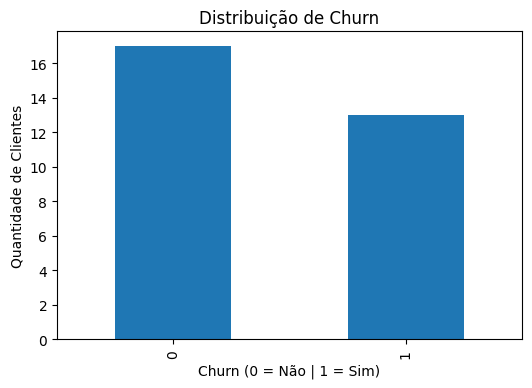

In [27]:
plt.figure(figsize=(6,4))
df['churn'].value_counts().plot(kind='bar')
plt.title("Distribuição de Churn")
plt.xlabel("Churn (0 = Não | 1 = Sim)")
plt.ylabel("Quantidade de Clientes")
plt.show()

## Correlação

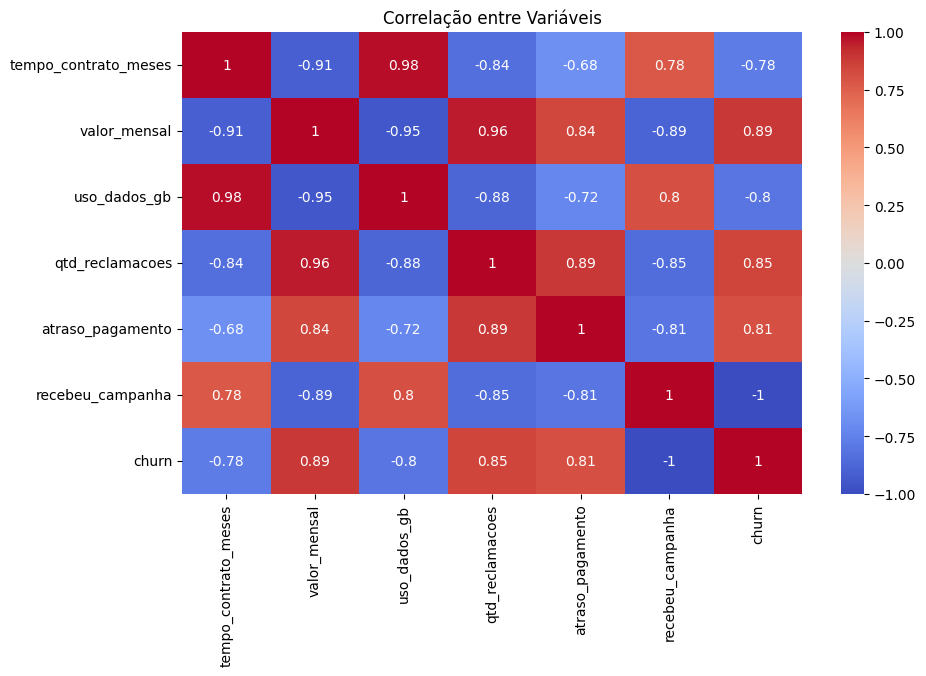

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(
    df.drop(columns=['id_cliente']).corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlação entre Variáveis")
plt.show()


## Preparação dos dados
Limpeza e separação

In [30]:
X = df.drop(columns=['id_cliente', 'churn'])
y = df['churn']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

## Padronização

In [32]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Treinamento

In [33]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

## Avaliação

In [34]:
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy do modelo: {accuracy:.2f}")

Accuracy do modelo: 1.00


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



## Matriz de confusão

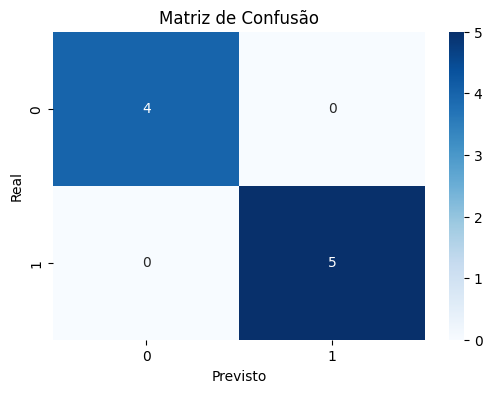

In [36]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


## Impacto

In [37]:
importance = pd.DataFrame({
    'Variável': X.columns,
    'Impacto no Churn': model.coef_[0]
}).sort_values(by='Impacto no Churn')


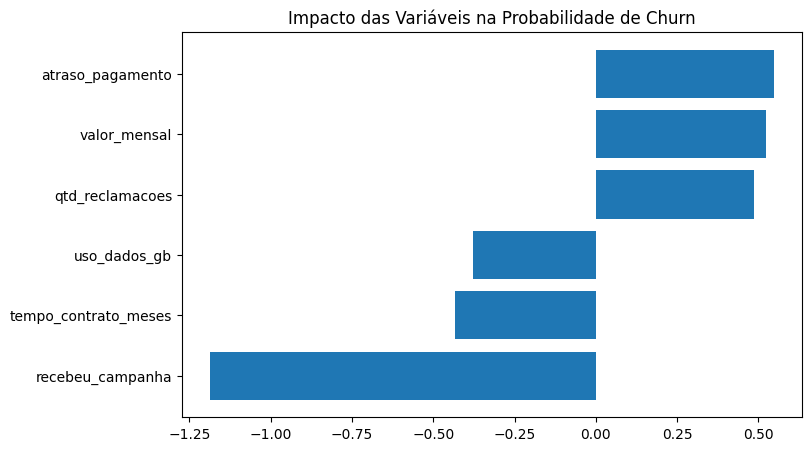

In [38]:
plt.figure(figsize=(8,5))
plt.barh(importance['Variável'], importance['Impacto no Churn'])
plt.title("Impacto das Variáveis na Probabilidade de Churn")
plt.show()


## Predição - Inferência

In [39]:
df['churn_probability'] = model.predict_proba(
    scaler.transform(X)
)[:, 1]


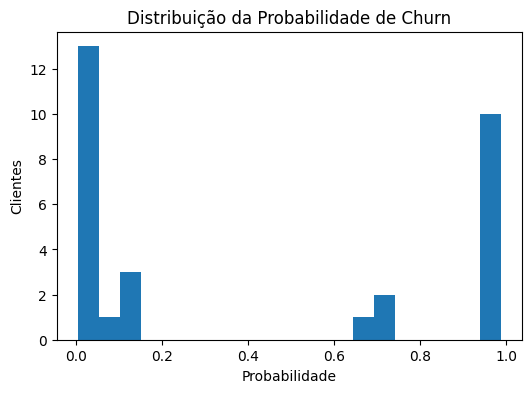

In [40]:
plt.figure(figsize=(6,4))
plt.hist(df['churn_probability'], bins=20)
plt.title("Distribuição da Probabilidade de Churn")
plt.xlabel("Probabilidade")
plt.ylabel("Clientes")
plt.show()


## Segmentação de clientes

In [41]:
df['risk_segment'] = pd.cut(
    df['churn_probability'],
    bins=[0, 0.3, 0.6, 1.0],
    labels=['Baixo', 'Médio', 'Alto']
)


In [42]:
df[['id_cliente', 'churn_probability', 'risk_segment']] \
    .sort_values(by='churn_probability', ascending=False) \
    .head(10)


,id_cliente,churn_probability,risk_segment
3,1004,0.987037,Alto
15,1016,0.985181,Alto
10,1011,0.971559,Alto
23,1024,0.970281,Alto
0,1001,0.969941,Alto
7,1008,0.964594,Alto
17,1018,0.958539,Alto
21,1022,0.949931,Alto
26,1027,0.949369,Alto
5,1006,0.949369,Alto


## Conclusão
- Usamos dados reais para entender churn
- Criamos um modelo de IA tradicional
- Geramos insights claros para Marketing
- Saímos com uma lista acionável de clientes